<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/BaiTap4MonAn/blob/Source-code-File/BaiTapKiemTra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHÂN BIỆT 4 MÓN ĂN: BÁNH XÈO, BẢNH HỎI, BÁNH ƯỚT, BÁNH DA LỢN

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [3]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [4]:
train_set=train.flow_from_directory('/content/drive/MyDrive/PhanBiet4MonAn/Train',target_size = (150,150),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/PhanBiet4MonAn/Test',target_size = (150,150),batch_size = 12,class_mode = 'categorical')

Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [5]:
train_set.class_indices

{'BanhDaLon': 0, 'BanhHoi': 1, 'BanhUot': 2, 'BanhXeo': 3}

In [10]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(150,150,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(4,activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [11]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(train_set,batch_size=32,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
7/7 [==============================] - 33s 5s/step - loss: 1.5745 - accuracy: 0.2750 - val_loss: 1.3460 - val_accuracy: 0.4000
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 1.3519 - accuracy: 0.3500 - val_loss: 1.2894 - val_accuracy: 0.2500
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 1.2776 - accuracy: 0.3500 - val_loss: 1.1647 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 1.1815 - accuracy: 0.5375 - val_loss: 0.9673 - val_accuracy: 0.9000
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 1.0128 - accuracy: 0.5625 - val_loss: 0.7703 - val_accuracy: 0.6500
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.9694 - accuracy: 0.6125 - val_loss: 0.7448 - val_accuracy: 0.6000
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.8599 - accuracy: 0.6250 - val_loss: 0.6219 - val_accuracy: 0.8500
Epoch 8/20
7/7 [====================

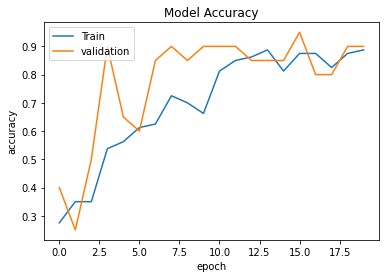

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [14]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

2/2 [==============================] - 1s 190ms/step - loss: 0.2237 - accuracy: 0.9000
Sai số:  0.22366395592689514
Độ chính xác:  0.8999999761581421


In [16]:
model.save('4monan.h5')

In [18]:
from tensorflow.keras.models import load_model
model1=load_model('4monan.h5')

BanhXeo


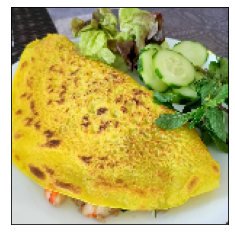

In [20]:
classes=['BanhDaLon','BanhHoi','BanhUot','BanhXeo']
url='/content/BanhXeo (11).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

BanhDaLon


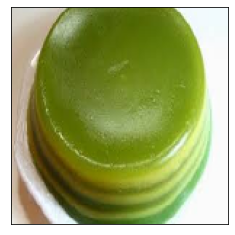

In [21]:
url='/content/image (4).png'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

BanhUot


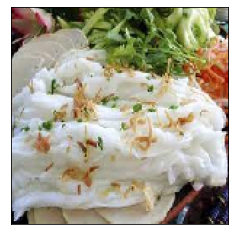

In [22]:
url='/content/banhuot.png'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

BanhHoi


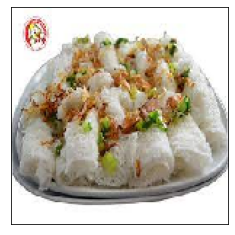

In [23]:
url='/content/BanhHoi (5).png'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])